In [1]:
!pip install bsedata

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from bsedata import bse
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from threading import Thread
from time import time
import math

In [3]:
# Object which implements functionality of BSE Package
b = bse.BSE()

In [4]:
# Sorted List Codes of Top Gainers
b.topGainers()

[{'securityID': 'LGBBROSLTD',
  'scripCode': '500250',
  'LTP': '1,041.15',
  'change': '101.70',
  'pChange': '10.83'},
 {'securityID': 'NATCOPHARM',
  'scripCode': '524816',
  'LTP': '675.70',
  'change': '48.75',
  'pChange': '7.78'},
 {'securityID': 'ISEC',
  'scripCode': '541179',
  'LTP': '563.80',
  'change': '37.55',
  'pChange': '7.14'},
 {'securityID': 'DCMSHRIRAM',
  'scripCode': '523367',
  'LTP': '916.80',
  'change': '51.60',
  'pChange': '5.96'},
 {'securityID': 'GILLETTE',
  'scripCode': '507815',
  'LTP': '4,828.00',
  'change': '249.05',
  'pChange': '5.44'}]

In [5]:
# Details of Top Gainers
top_gainers = b.topGainers()
res = []
for i,gainer in enumerate(top_gainers):
  try:
    res.append( b.getQuote(gainer['scripCode']) )
  except:
    pass

res[0]

{'companyName': 'L.G.BALAKRISHNAN & BROS.LTD.',
 'currentValue': '1041.15',
 'change': '101.70',
 'pChange': '10.83',
 'updatedOn': '23 Jun 23 | 04:00 PM',
 'securityID': 'LGBBROSLTD',
 'scripCode': '500250',
 'group': 'A  / S&P BSE SmallCap',
 'faceValue': '10.00',
 'industry': 'Automobile and Auto Components',
 'previousClose': '939.45',
 'previousOpen': '948.50',
 'dayHigh': '1061.75',
 'dayLow': '933.95',
 '52weekHigh': '1061.75',
 '52weekLow': '555.80',
 'weightedAvgPrice': '1015.41',
 'totalTradedValue': '5.75 Cr.',
 'totalTradedQuantity': '0.57 Lakh',
 '2WeekAvgQuantity': '0.20 Lakh',
 'marketCapFull': '3,268.42 Cr.',
 'marketCapFreeFloat': '2,157.16 Cr.',
 'buy': {'1': {'quantity': '-', 'price': '0.00'},
  '2': {'quantity': '-', 'price': '0.00'},
  '3': {'quantity': '-', 'price': '0.00'},
  '4': {'quantity': '-', 'price': '0.00'},
  '5': {'quantity': '-', 'price': '0.00'}},
 'sell': {'1': {'price': '0.00', 'quantity': '-'},
  '2': {'price': '0.00', 'quantity': '-'},
  '3': {'pr

In [6]:
# Details of Top Gainers
top_gainers = b.topGainers()
top_gainer_names = []
for gainer in top_gainers:
  try:
    top_gainer_names.append( b.getQuote(gainer['scripCode'])['companyName'] )
  except:
    pass
top_gainer_names

['L.G.BALAKRISHNAN & BROS.LTD.',
 'NATCO PHARMA LTD.',
 'ICICI Securities Ltd',
 'DCM Shriram Limited',
 'GILLETTE INDIA LTD.']

In [7]:
# Getting the scripCodes and corresponding company names
b.updateScripCodes()
comps = b.getScripCodes()
comps

{'533022': '20 Microns Ltd.',
 '532628': '3i Infotech Ltd.',
 '523395': '3m India Ltd.',
 '590116': '7seas Technologies Ltd-$',
 '512161': '8k Miles Software Services Ltd.',
 '538351': 'A.f. Enterprises Ltd',
 '539300': 'A.k. Spintex Ltd',
 '530499': 'A.k.capital Services Ltd.',
 '533292': 'A2z Infra Engineering Limited',
 '531611': 'Aadhaar Ventures India Ltd.',
 '530027': 'Aadi Industries Ltd.',
 '531866': 'Aagam Capital Ltd.',
 '539096': 'Aananda Lakshmi Spinning Mills Ltd',
 '538812': 'Aanchal Ispat Ltd',
 '524412': 'Aarey Drugs & Pharmaceuticals Ltd.',
 '524348': 'Aarti Drugs Ltd.',
 '524208': 'Aarti Industries Ltd.',
 '514274': 'Aarvee Denims & Exports Ltd.',
 '531731': 'Aarya Global Shares And Securities Ltd.',
 '519319': 'Aashee Infotech Ltd.',
 '512038': 'Aaswa Trading & Exports Ltd.',
 '523204': 'Aban Offshore Ltd.',
 '512165': 'Abans Enterprises Ltd',
 '500002': 'Abb India Limited',
 '500488': 'Abbott India Ltd.',
 '505665': 'Abc Bearings Ltd.-$',
 '513119': 'Abc Gas (intern

In [8]:
print(len(comps))

4487


In [9]:
b.getQuote('500002')

{'companyName': 'ABB India Limited',
 'currentValue': '4238.40',
 'change': '-30.65',
 'pChange': '-0.72',
 'updatedOn': '23 Jun 23 | 04:00 PM',
 'securityID': 'ABB',
 'scripCode': '500002',
 'group': 'A  / S&P BSE 200',
 'faceValue': '2.00',
 'industry': 'Capital Goods',
 'previousClose': '4269.05',
 'previousOpen': '4275.00',
 'dayHigh': '4303.50',
 'dayLow': '4230.05',
 '52weekHigh': '4442.80',
 '52weekLow': '2224.15',
 'weightedAvgPrice': '4260.38',
 'totalTradedValue': '2.15 Cr.',
 'totalTradedQuantity': '0.05 Lakh',
 '2WeekAvgQuantity': '0.07 Lakh',
 'marketCapFull': '89,815.25 Cr.',
 'marketCapFreeFloat': '22,453.81 Cr.',
 'buy': {'1': {'quantity': '-', 'price': '0.00'},
  '2': {'quantity': '-', 'price': '0.00'},
  '3': {'quantity': '-', 'price': '0.00'},
  '4': {'quantity': '-', 'price': '0.00'},
  '5': {'quantity': '-', 'price': '0.00'}},
 'sell': {'1': {'price': '0.00', 'quantity': '-'},
  '2': {'price': '0.00', 'quantity': '-'},
  '3': {'price': '0.00', 'quantity': '-'},
  '

In [10]:
d = {
    'scripCode': [],
    'companyName': [],
}
for code,name in comps.items():
  d['scripCode'].append(code)
  d['companyName'].append(name)
companies_df = pd.DataFrame(d)
companies_df.to_csv('companies.csv', index=None)

In [11]:
# Creating Custom Thread to download Stock Data

class GetQuoteThread(Thread):

  def __init__(self, i, comps):
    # print(f'Init: {i}')
    Thread.__init__(self)
    self.data = dict()
    self.comps = comps
    self.i = i
    self.success = 0
    self.fail = 0

  def run(self):
    for code in self.comps:

      try:
        self.data[code] = b.getQuote(code)
        self.success += 1
      except Exception:
        self.fail += 1


In [12]:
# Takes around 3 mins
# To reduce this, decrease stocks per_thread -> Increases no: of Threads

threads = []
codes = list( comps.keys() )
per_thread = 125

for i in range(per_thread, per_thread*math.ceil(len(codes)//per_thread)+1, per_thread):
  threads.append( GetQuoteThread( i, codes[i-per_thread:i] ) )

for thread in threads:
  thread.start()

comp_quotes = dict()
s,f = 0,0
for thread in threads:
  thread.join()
  comp_quotes.update(thread.data)
  s += thread.success
  f += thread.fail
  # print(thread.t2-thread.t1)
  # print(thread.data)

In [13]:
# Just some debugging -> Works alright!
# Some Threads have failed. Maybe some outdated stocks
len(comp_quotes), s, f, s+f

(2922, 2922, 1453, 4375)

In [14]:
# Picking out the Top 'n' companies in terms of their MarketCap
n = 1000
codes = list( comp_quotes.keys() )
codes.sort(key = lambda x: comp_quotes[x]['marketCapFull'])
codes = codes[:n]

print(f'The Selected {n} Companies are:\n')
for i,code in enumerate(codes[::-1]):
  name = b.getQuote(code)['companyName']
  print(f'{i+1}. {name}')

The Selected 1000 Companies are:

1. OSWAL YARNS LTD.
2. Pacheli Industrial Finance Ltd
3. Vasudhagama Enterprises Ltd
4. JAYABHARAT CREDIT LTD.-$
5. BMB MUSIC & MAGNETICS LTD.
6. RSC INTERNATIONAL LTD.
7. Indra Industries Ltd
8. Servoteach Industries Ltd
9. Concrete Credit Ltd
10. VAX HOUSING FINANCE CORPORATION LTD.
11. ACE Edutrend Ltd
12. PLANTER POLYSACKS LTD.
13. ASHIANA AGRO INDUSTRIES LTD.
14. NIKKI GLOBAL FINANCE LTD.
15. SHIVA SUITINGS LTD.
16. BRIDGE SECURITIES LTD.
17. JAUSS POLYMERS LTD.
18. BRIJLAXMI LEASING & FINANCE LTD.
19. FOUNDRY FUEL PRODUCTS LTD.
20. CHAMBAL BREWERIES & DISTILLERIES LTD.
21. DOLPHIN MEDICAL SERVICES LTD.
22. REGENCY TRUST LTD.
23. City Online Services Ltd
24. Richirich Inventures Limited
25. Twinstar Industries Limited
26. NEOGEM INDIA LTD.
27. KLG CAPITAL SERVICES LTD.
28. SHELTER INFRA PROJECTS LTD.-$
29. Gold Coin Health Foods Ltd
30. DECCAN POLYPACKS LTD.
31. UNIVERSAL ARTS LTD.
32. RAJASTHAN PETRO SYNTHETICS LTD.
33. INDIAN BRIGHT STEEL CO.LTD

In [15]:
# Getting The Price data for the past 12 months
prices = {}
for code in codes:
  ret = b.getPeriodTrend( code, '12M' )
  # print(code, ret)
  prices[code] = [ day['value'] for day in ret ]
  # print(len(data[comp]))be
print(prices.keys())

dict_keys(['532470', '539408', '532139', '512197', '519319', '532336', '538537', '521238', '531207', '504132', '532187', '590065', '511034', '532842', '539221', '500295', '532775', '524774', '531241', '531449', '532424', '531431', '532309', '504000', '517536', '507753', '513228', '507488', '532755', '532932', '506618', '509874', '524520', '531847', '521248', '532366', '514043', '532976', '520066', '500300', '534425', '532285', '532884', '532808', '530655', '532406', '500429', '502180', '508954', '526407', '539201', '500268', '512379', '506879', '539148', '523207', '532486', '532256', '532515', '500304', '526173', '500078', '532868', '506687', '513519', '532928', '500825', '517500', '590134', '506022', '506109', '500650', '531147', '520073', '524332', '527001', '530011', '534809', '500108', '538970', '500207', '530199', '500117', '530965', '500333', '532945', '504212', '523301', '533168', '513349', '500188', '500550', '532977', '532729', '532851', '532663', '533344', '530131', '534748',

In [16]:
# Pick only the stocks where data isn't missing
working_days = max(len(prices[code]) for code in codes)
price_data = dict()
final_codes = []

for code in codes:
  if len(prices[code]) == working_days:
    price_data[comps[code]] = prices[code]
    final_codes.append(code)

prices_df = pd.DataFrame(price_data)
prices_df.to_csv('price_data.csv', index=None)

In [17]:
prices_df = pd.read_csv('price_data.csv')

In [18]:
# Price Data of Prev 12 Months
prices_df

,Permanent Magnets Ltd.-$,Indusind Bank Ltd.,Jindal Drilling & Industries Ltd.,Sree Rayalaseema Hi-strength Hypo Ltd.,Sportking India Ltd,Vedanta Limited,Gtl Infrastructure Ltd.,Ngl Fine-chem Ltd.,Linc Pen & Plastics Ltd.-$,Grm Overseas Ltd.,...,Somany Ceramics Ltd.,South India Projects Ltd,Jai Corp Ltd.,Jindal Poly Films Ltd.,Gokaldas Exports Ltd.,Indoco Remedies Ltd.,Ifci Ltd.,Tata Sponge Iron Ltd.,Axis Bank Ltd.,Bridge Securities Ltd.
0,323.45,786.65,174.55,400.60,835.90,219.45,1.19,1628.60,247.75,308.50,...,534.80,77.03,102.65,957.45,341.35,366.50,8.66,557.65,629.25,10.17
1,338.75,806.20,175.60,412.70,877.65,221.40,1.19,1638.05,251.25,307.40,...,553.95,77.81,104.85,965.50,355.70,367.15,8.91,562.60,634.00,9.68
2,341.90,823.00,179.70,421.15,921.50,227.85,1.16,1674.20,255.20,322.75,...,568.60,79.39,107.95,997.35,360.15,374.10,8.95,588.75,637.00,9.52
3,339.70,817.35,182.45,435.50,919.95,234.90,1.13,1722.45,249.75,338.85,...,561.65,76.69,111.25,1001.70,353.30,372.30,8.93,600.25,642.30,9.74
4,326.25,807.55,184.95,425.90,965.90,232.10,1.08,1702.40,244.05,355.75,...,559.05,78.94,118.00,1010.00,349.35,370.75,8.87,586.85,625.80,9.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,1176.85,1301.20,358.30,632.80,819.45,280.50,0.86,1655.35,713.35,182.45,...,688.30,233.35,171.25,679.75,478.55,331.40,12.15,685.80,965.75,6.70
245,1166.00,1298.10,373.10,624.50,828.05,282.60,0.85,1655.40,728.20,177.50,...,705.95,244.65,173.25,681.30,514.40,329.50,12.79,686.40,974.45,6.99
246,1237.75,1286.75,362.90,615.70,826.25,281.25,0.83,1696.90,709.20,176.20,...,707.40,253.75,171.75,676.60,497.65,327.95,12.27,679.40,965.85,7.39
247,1168.35,1273.35,354.00,612.95,813.70,280.65,0.81,1673.00,711.05,176.85,...,697.10,254.95,168.05,671.70,485.85,321.40,11.93,661.95,965.05,6.90


In [19]:
# Daily Returns for past 12 Months
ret_df = prices_df.pct_change().drop(0)
ret_df

,Permanent Magnets Ltd.-$,Indusind Bank Ltd.,Jindal Drilling & Industries Ltd.,Sree Rayalaseema Hi-strength Hypo Ltd.,Sportking India Ltd,Vedanta Limited,Gtl Infrastructure Ltd.,Ngl Fine-chem Ltd.,Linc Pen & Plastics Ltd.-$,Grm Overseas Ltd.,...,Somany Ceramics Ltd.,South India Projects Ltd,Jai Corp Ltd.,Jindal Poly Films Ltd.,Gokaldas Exports Ltd.,Indoco Remedies Ltd.,Ifci Ltd.,Tata Sponge Iron Ltd.,Axis Bank Ltd.,Bridge Securities Ltd.
1,0.047303,0.024852,0.006015,0.030205,0.049946,0.008886,0.000000,0.005803,0.014127,-0.003566,...,0.035808,0.010126,0.021432,0.008408,0.042039,0.001774,0.028868,0.008877,0.007549,-0.048181
2,0.009299,0.020839,0.023349,0.020475,0.049963,0.029133,-0.025210,0.022069,0.015721,0.049935,...,0.026446,0.020306,0.029566,0.032988,0.012511,0.018930,0.004489,0.046481,0.004732,-0.016529
3,-0.006435,-0.006865,0.015303,0.034073,-0.001682,0.030941,-0.025862,0.028820,-0.021356,0.049884,...,-0.012223,-0.034009,0.030570,0.004362,-0.019020,-0.004812,-0.002235,0.019533,0.008320,0.023109
4,-0.039594,-0.011990,0.013702,-0.022044,0.049948,-0.011920,-0.044248,-0.011640,-0.022823,0.049875,...,-0.004629,0.029339,0.060674,0.008286,-0.011180,-0.004163,-0.006719,-0.022324,-0.025689,-0.022587
5,0.023295,-0.016098,-0.012976,-0.005048,-0.035563,-0.039423,0.037037,-0.023702,-0.003483,0.049895,...,0.006261,0.016595,-0.021186,-0.024257,-0.007156,-0.021848,-0.020293,-0.018659,0.017418,0.049370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,-0.031957,-0.009063,-0.014983,0.000791,0.016940,0.000535,0.000000,0.009267,-0.035557,0.011083,...,-0.022371,-0.007233,0.025142,-0.011057,-0.008803,0.002875,0.008299,-0.006375,-0.015445,-0.056338
245,-0.009220,-0.002382,0.041306,-0.013116,0.010495,0.007487,-0.011628,0.000030,0.020817,-0.027131,...,0.025643,0.048425,0.011679,0.002280,0.074914,-0.005733,0.052675,0.000875,0.009009,0.043284
246,0.061535,-0.008744,-0.027339,-0.014091,-0.002174,-0.004777,-0.023529,0.025069,-0.026092,-0.007324,...,0.002054,0.037196,-0.008658,-0.006899,-0.032562,-0.004704,-0.040657,-0.010198,-0.008825,0.057225
247,-0.056069,-0.010414,-0.024525,-0.004466,-0.015189,-0.002133,-0.024096,-0.014085,0.002609,0.003689,...,-0.014560,0.004729,-0.021543,-0.007242,-0.023711,-0.019973,-0.027710,-0.025684,-0.000828,-0.066306


In [20]:
# Covariance Matrix of Returns Matrix
cov = np.round( ret_df.cov(), 6 )
cov

,Permanent Magnets Ltd.-$,Indusind Bank Ltd.,Jindal Drilling & Industries Ltd.,Sree Rayalaseema Hi-strength Hypo Ltd.,Sportking India Ltd,Vedanta Limited,Gtl Infrastructure Ltd.,Ngl Fine-chem Ltd.,Linc Pen & Plastics Ltd.-$,Grm Overseas Ltd.,...,Somany Ceramics Ltd.,South India Projects Ltd,Jai Corp Ltd.,Jindal Poly Films Ltd.,Gokaldas Exports Ltd.,Indoco Remedies Ltd.,Ifci Ltd.,Tata Sponge Iron Ltd.,Axis Bank Ltd.,Bridge Securities Ltd.
Permanent Magnets Ltd.-$,0.001159,0.000050,0.000065,0.000113,0.000066,0.000034,0.000062,0.000122,0.000133,0.000029,...,0.000097,-0.000004,0.000098,0.000017,-0.000006,0.000038,0.000113,0.000093,0.000051,0.000222
Indusind Bank Ltd.,0.000050,0.000363,0.000082,0.000117,0.000107,0.000122,0.000085,0.000037,0.000117,0.000106,...,0.000066,-0.000005,0.000165,0.000095,0.000095,0.000044,0.000154,0.000109,0.000104,0.000040
Jindal Drilling & Industries Ltd.,0.000065,0.000082,0.001044,0.000211,0.000225,0.000130,0.000128,0.000226,0.000173,0.000271,...,0.000105,-0.000003,0.000211,0.000101,0.000087,0.000052,0.000187,0.000118,0.000095,0.000065
Sree Rayalaseema Hi-strength Hypo Ltd.,0.000113,0.000117,0.000211,0.001291,0.000113,0.000204,0.000154,0.000031,0.000096,0.000168,...,0.000107,-0.000018,0.000192,0.000149,0.000110,0.000090,0.000212,0.000146,0.000062,0.000070
Sportking India Ltd,0.000066,0.000107,0.000225,0.000113,0.000919,0.000112,0.000077,0.000002,0.000134,0.000162,...,0.000154,0.000029,0.000235,0.000114,0.000139,0.000014,0.000215,0.000106,0.000064,0.000089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Indoco Remedies Ltd.,0.000038,0.000044,0.000052,0.000090,0.000014,0.000053,0.000038,0.000032,0.000053,0.000134,...,0.000035,0.000021,0.000076,0.000048,0.000024,0.000442,0.000081,0.000052,0.000040,0.000101
Ifci Ltd.,0.000113,0.000154,0.000187,0.000212,0.000215,0.000162,0.000225,0.000110,0.000226,0.000240,...,0.000097,-0.000019,0.000313,0.000120,0.000170,0.000081,0.000909,0.000133,0.000079,0.000201
Tata Sponge Iron Ltd.,0.000093,0.000109,0.000118,0.000146,0.000106,0.000175,0.000126,0.000040,0.000077,0.000082,...,0.000074,0.000022,0.000191,0.000091,0.000100,0.000052,0.000133,0.000338,0.000079,0.000006
Axis Bank Ltd.,0.000051,0.000104,0.000095,0.000062,0.000064,0.000072,0.000101,0.000024,0.000061,0.000036,...,0.000035,0.000008,0.000072,0.000051,0.000044,0.000040,0.000079,0.000079,0.000201,-0.000018


In [21]:
# Mean Daily Return Percentage
ret_means = ret_df.mean(axis=0).to_numpy()

In [22]:
num_companies = len(cov)

num_port = 100
port_weights = []
port_rets = []
port_risk = []
sharpe_ratios = []

for portfolio in range(num_port):
  weights = np.random.random_sample(num_companies)
  weights = np.round((weights / np.sum (weights)),6)
  port_weights.append(weights)
  annualized_returns = np.sum(ret_means.T * weights)
  port_rets.append(annualized_returns)
  portfolio_variance = np.dot(np.dot(weights,cov), weights.T)
  portfolio_stdv = np.sqrt(portfolio_variance)
  port_risk.append(portfolio_stdv)
  sharpe_ratio = (annualized_returns)/portfolio_stdv
  sharpe_ratios.append(sharpe_ratio)

In [23]:
port_rets = np.array(port_rets)
port_risk = np.array(port_risk)
sharpe_ratios = np.array(sharpe_ratios)

In [24]:
portfolio_metrics = [port_rets, port_risk, sharpe_ratios, port_weights]

In [25]:
portfolio_df = pd.DataFrame(portfolio_metrics).T
portfolio_df.columns=['Returns','Risk','Sharpe','Weights']

In [26]:
portfolio_df

,Returns,Risk,Sharpe,Weights
0,0.0013,0.008645,0.150355,"[0.002485, 0.002461, 0.001914, 0.001364, 0.002..."
1,0.0012,0.00865,0.138764,"[0.000768, 0.002554, 0.000893, 0.002574, 3.3e-..."
2,0.001257,0.008658,0.145155,"[0.001343, 0.000822, 0.002622, 0.000429, 0.000..."
3,0.001247,0.00865,0.144148,"[0.00138, 0.001059, 0.002327, 0.001784, 0.0029..."
4,0.001231,0.008784,0.140089,"[0.000826, 0.000752, 0.000191, 0.002682, 0.000..."
...,...,...,...,...
95,0.001187,0.008852,0.134077,"[0.000794, 0.000214, 0.000643, 0.001986, 0.001..."
96,0.001299,0.008732,0.148746,"[0.001574, 0.000426, 0.002248, 0.002137, 0.000..."
97,0.001254,0.008773,0.142953,"[0.000333, 0.002096, 0.001752, 0.002739, 0.002..."
98,0.001269,0.008675,0.146296,"[0.000677, 0.00125, 0.002718, 0.001726, 0.0008..."


In [27]:
min_risk = portfolio_df.iloc[portfolio_df['Risk'].astype(float).idxmin()]
highest_return = portfolio_df.iloc[portfolio_df['Returns'].astype(float).idxmax()]
highest_sharpe = portfolio_df.iloc[portfolio_df['Sharpe'].astype(float).idxmax()]

In [28]:
print('Lowest risk')
print(min_risk)
print('\nHighest return')
print(highest_return)
print('\nHighest sharpe')
print(highest_sharpe)

Lowest risk
Returns                                             0.001266
Risk                                                0.008532
Sharpe                                              0.148332
Weights    [0.001401, 1.2e-05, 0.000758, 0.002151, 1.5e-0...
Name: 61, dtype: object

Highest return
Returns                                             0.001346
Risk                                                0.008685
Sharpe                                              0.154932
Weights    [0.002706, 0.000585, 0.00172, 0.002025, 0.0018...
Name: 83, dtype: object

Highest sharpe
Returns                                             0.001346
Risk                                                0.008685
Sharpe                                              0.154932
Weights    [0.002706, 0.000585, 0.00172, 0.002025, 0.0018...
Name: 83, dtype: object


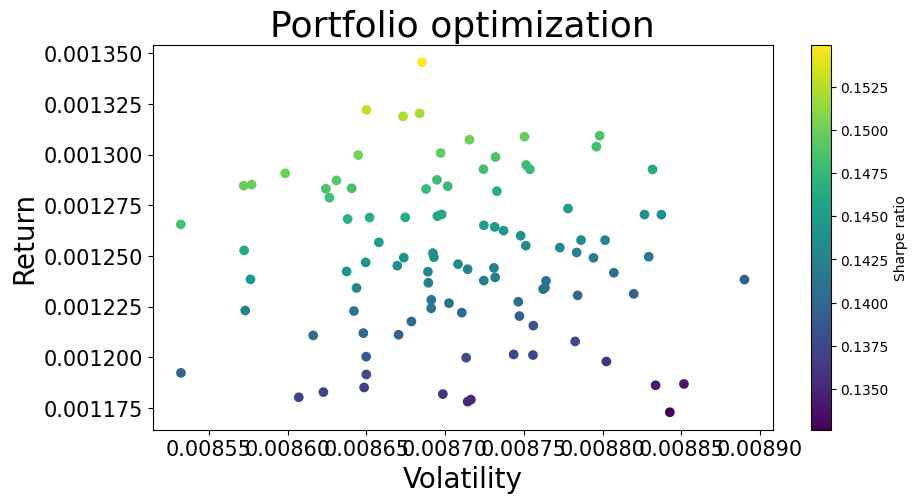

In [29]:
plt.figure(figsize=(10,5))
plt.scatter(port_risk,port_rets,c=port_rets/port_risk)
plt.title('Portfolio optimization',fontsize=26)
plt.xlabel('Volatility', fontsize = 20)
plt.ylabel('Return',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.colorbar(label='Sharpe ratio')

In [ ]:
best_w = highest_sharpe['Weights']
for i,code in enumerate(final_codes):
  name = b.getQuote(code)['companyName']
  text = f'{i+1}. {name} ({code}) - Weight: {best_w[i]}'
  if best_w[i] > 0.015:
    print(f'\t{text}')  # Recommendable to buy these
  else:
    print(text)

1. PERMANENT MAGNETS LTD.-$ (504132) - Weight: 0.002706
2. INDUSIND BANK LTD. (532187) - Weight: 0.000585
3. JINDAL DRILLING & INDUSTRIES LTD. (511034) - Weight: 0.00172
4. SREE RAYALASEEMA HI-STRENGTH HYPO LTD. (532842) - Weight: 0.002025
5. Sportking India Ltd (539221) - Weight: 0.001864
6. Vedanta Limited (500295) - Weight: 0.001141
7. GTL INFRASTRUCTURE LTD. (532775) - Weight: 0.000104
8. NGL FINE-CHEM LTD. (524774) - Weight: 0.001931
9. Linc Ltd-$ (531241) - Weight: 0.00151
10. GRM OVERSEAS LTD. (531449) - Weight: 9.3e-05
11. GODREJ CONSUMER PRODUCTS LTD. (532424) - Weight: 0.001583
12. SHAKTI PUMPS (INDIA) LTD.-$ (531431) - Weight: 0.000895
13. GE Power India Ltd (532309) - Weight: 0.001868
14. ELPRO INTERNATIONAL LTD. (504000) - Weight: 5.9e-05
15. ONWARD TECHNOLOGIES LTD. (517536) - Weight: 0.002069
16. TGV Sraac Ltd (507753) - Weight: 0.000375
17. PENNAR INDUSTRIES LTD.-$ (513228) - Weight: 0.00115
18. G.M.BREWERIES LTD. (507488) - Weight: 0.001816
19. TECH MAHINDRA LTD. (5327